In [ ]:
from google.colab import files
uploaded = files.upload()  # Selecciona el archivo ZIP

Saving plantas.zip to plantas.zip


In [ ]:
import zipfile
import os

# Define el nombre del archivo ZIP que subiste
zip_file = 'plantas.zip'  # Cambia este nombre por el del archivo ZIP que subiste

# Descomprimir el archivo en el directorio '/content'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/plantas')  # Extraer en el directorio '/content/plantas'

# Verificar los archivos descomprimidos
os.listdir('/content/plantas')


['plantvillage', 'PlantVillage']

In [ ]:
import os

# Mostrar las carpetas dentro de '/content/plantas'
print("Contenido de /content/plantas:")
print(os.listdir('/content/plantas'))

# Si existe una subcarpeta 'plantVillage', revisamos dentro de ella:
print("\nContenido de /content/plantas/plantvillage:")
print(os.listdir('/content/plantas/plantvillage'))


Contenido de /content/plantas:
['plantvillage', 'PlantVillage']

Contenido de /content/plantas/plantvillage:
['PlantVillage']


In [ ]:
train_dir = '/content/plantas/plantvillage'
validation_dir = '/content/plantas/plantvillage'  # si no hay carpeta val, usar parte para validación


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/plantas/plantvillage'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16511 images belonging to 1 classes.
Found 4127 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # congelamos

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1012s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1011s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 997s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 999s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1084s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1027s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1083s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1026s 2

In [ ]:
model.save('/content/mi_modelo_plantas.h5')
print("✅ Modelo guardado como mi_modelo_plantas.h5")


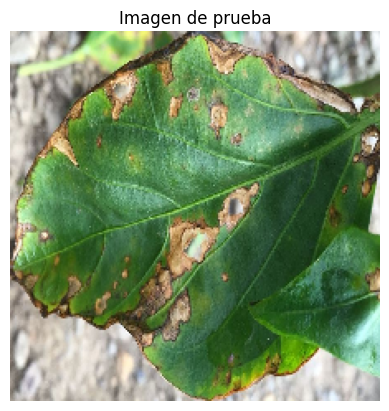

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

🌱 Planta detectada: PlantVillage
🦠 Enfermedad detectada: Desconocida o sana
🔍 Confianza: 100.00%

🎯 Top 3 predicciones:
 - PlantVillage (100.00%)


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen
img_path = 'hoja2.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Mostrar imagen
plt.imshow(img)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preparar imagen
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Realizar predicción
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
confidence = predictions[0][predicted_index] * 100

# Obtener nombre de clase
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_index]

# Separar planta y enfermedad
if "___" in predicted_label:
    planta, enfermedad = predicted_label.split("___")
else:
    planta = predicted_label
    enfermedad = "Desconocida o sana"

print(f"\n🌱 Planta detectada: {planta}")
print(f"🦠 Enfermedad detectada: {enfermedad}")
print(f"🔍 Confianza: {confidence:.2f}%")

# Top 3 predicciones (opcional)
top_indices = predictions[0].argsort()[-3:][::-1]
print("\n🎯 Top 3 predicciones:")
for i in top_indices:
    label = class_labels[i]
    score = predictions[0][i] * 100
    print(f" - {label} ({score:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


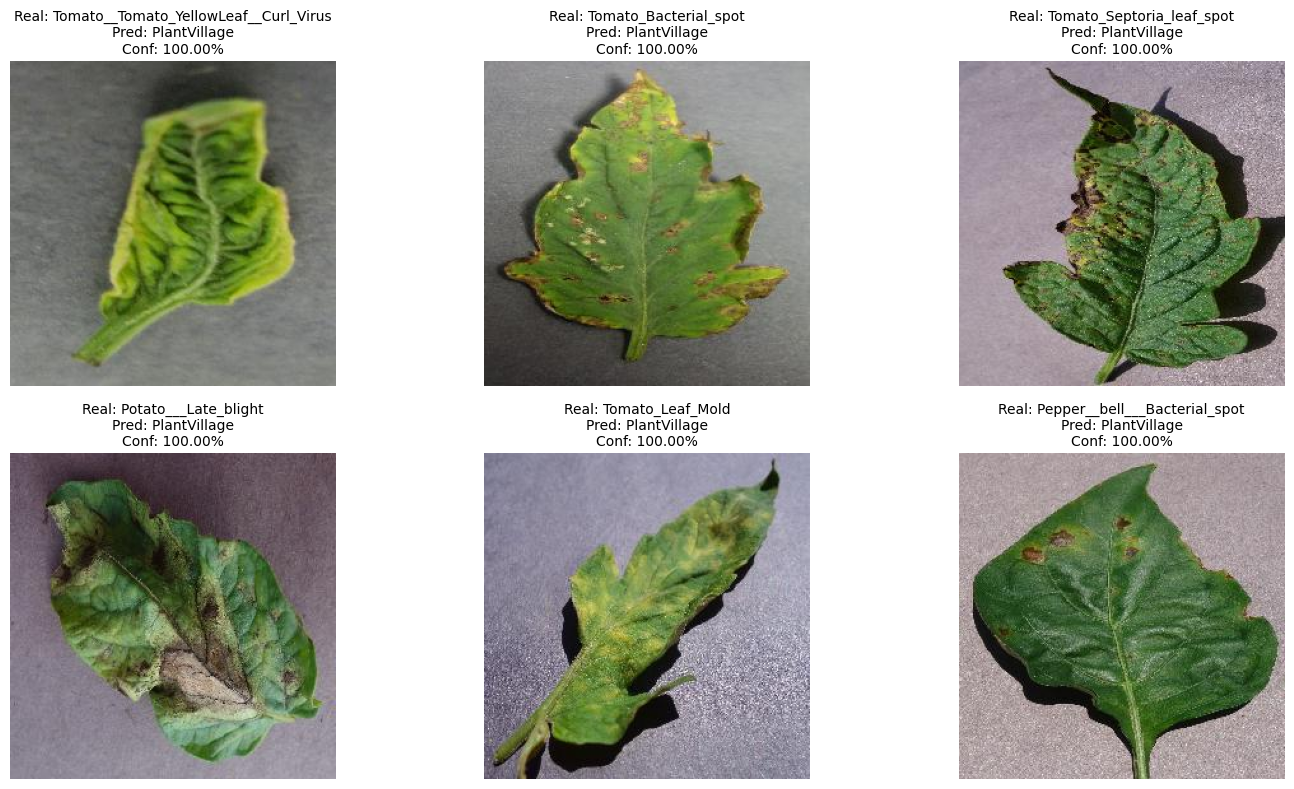

In [ ]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Ruta base del dataset
base_dir = '/content/plantas/plantvillage'

# Buscar imágenes en subcarpetas
imagenes = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            ruta = os.path.join(root, file)
            clase = os.path.basename(os.path.dirname(ruta))  # Carpeta = clase
            imagenes.append((ruta, clase))

# Mostrar y analizar hasta 6 imágenes
num_mostrar = min(6, len(imagenes))
imagenes_seleccionadas = random.sample(imagenes, num_mostrar)

# Obtener clases en orden alfabético como las cargó flow_from_directory
class_indices = train_generator.class_indices
clases = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(15, 8))

for i, (ruta, clase_real) in enumerate(imagenes_seleccionadas):
    # Cargar imagen
    img = load_img(ruta, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Predicción
    pred = model.predict(img_array)
    pred_index = np.argmax(pred)
    pred_clase = clases[pred_index]
    confianza = pred[0][pred_index] * 100

    # Mostrar
    plt.subplot(2, 3, i + 1)
    plt.imshow(load_img(ruta))
    plt.axis('off')
    plt.title(f"Real: {clase_real}\nPred: {pred_clase}\nConf: {confianza:.2f}%", fontsize=10)

plt.tight_layout()
plt.show()
